In [16]:
import numpy as np
import matplotlib.pyplot as plt

k = 10
steps = 10000
num_experiments = 1000

# Function to generate initial means
def generate_means():
    return np.random.normal(0, 1, k)

**Gradual Changes- drift change**

Mean Rewards at Terminal Step (drift change):
Optimistic Greedy(drift change): 0.746492376266299
Epsilon-Greedy Fixed (Alpha=0.1)(drift change): 1.3578542901441704
Epsilon-Greedy Decreasing(drift change): -0.02000206117347192


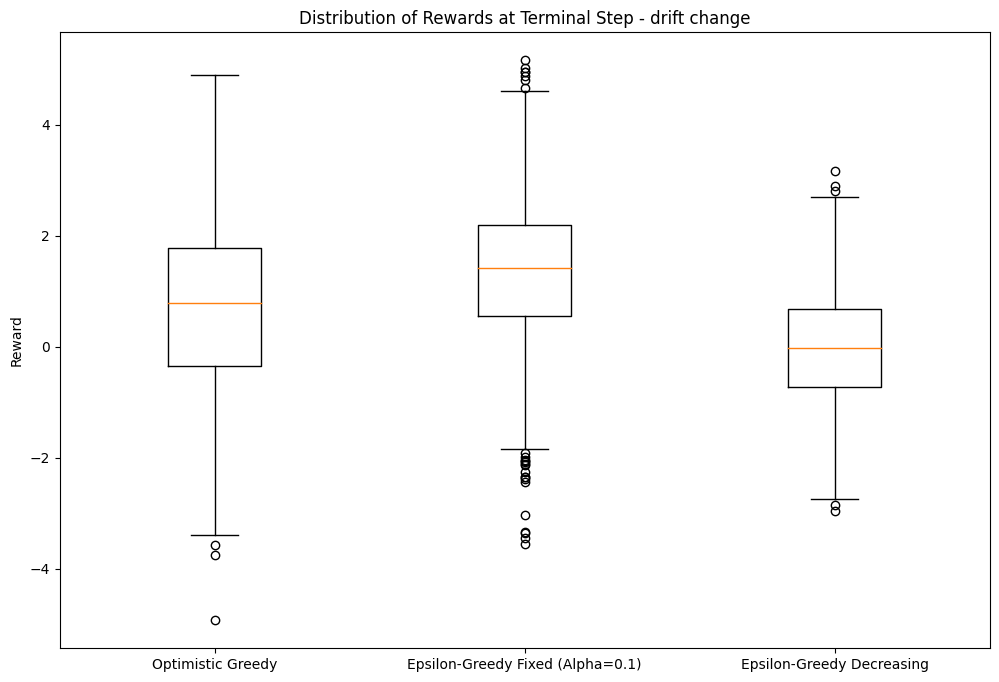

In [17]:
# Function to generate initial means for the k-armed bandit
def generate_means():
    return np.random.normal(0, 1, k)

# Function to generate rewards based on the current means
def generate_rewards(means):
    return np.random.normal(means, 1)

# Drift change function
def apply_drift(means):
    drift = np.random.normal(0, 0.001, k)
    return means + drift

# Optimistic Greedy Algorithm
def optimistic_greedy(means, steps):
    q_values = np.ones(k) * 5  # Optimistic initial values
    rewards = np.zeros(steps)

    for step in range(steps):
        action = np.argmax(q_values)  # Select action with the high Q-value
        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward

        # Update Q-value using incremental formula
        q_values[action] += (reward - q_values[action]) / (step + 1)

        # Apply drift to the means
        means = apply_drift(means)

    return rewards

# Epsilon-Greedy with Fixed Step Size (Alpha) Algorithm
def epsilon_greedy_fixed_alpha(means, steps, ep=0.1, alpha=0.1):
    q_values = np.zeros(k)  # Initialize Q-values to zero
    rewards = np.zeros(steps)

    for step in range(steps):
        if np.random.rand() < ep:  # Explore with probability epsilon
            action = np.random.choice(k)  # Select random action
        else:
            action = np.argmax(q_values)  # Exploit by selecting action with highest Q-value

        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Update Q-value using fixed step size (alpha)
        q_values[action] += alpha * (reward - q_values[action])

        # Apply drift to the means
        means = apply_drift(means)

    return rewards

# Epsilon-Greedy with Decreasing Step Size Algorithm
def epsilon_greedy_decreasing(means, steps, ep=0.1):
    q_values = np.zeros(k)  # Initialize Q-values to zero
    action_counts = np.zeros(k)  # Initialize action counts to zero
    rewards = np.zeros(steps)  # Array to store rewards for each step

    for step in range(steps):
        if np.random.rand() < ep:  # Explore with probability epsilon
            action = np.random.choice(k)  # Select random action
        else:
            action = np.argmax(q_values)  # Exploit by selecting action with highest Q-value

        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Increment action count and update Q-value using decreasing step size
        action_counts[action] += 1
        step_size = 1 / action_counts[action]  # Decreasing step size
        q_values[action] += step_size * (reward - q_values[action])

        # Apply mean-reverting change to the means
        means = apply_mean_reverting_change(means)

    return rewards

# Run the algorithms
optimistic_rewards = np.zeros((num_experiments, steps))
fixed_rewards = np.zeros((num_experiments, steps))
decreasing_rewards = np.zeros((num_experiments, steps))

for i in range(num_experiments):
    means = generate_means()  # Generate initial means for each experiment
    optimistic_rewards[i] = optimistic_greedy(means, steps)  # Run optimistic greedy algorithm

    means = generate_means()  # Generate new initial means
    fixed_rewards[i] = epsilon_greedy_fixed_alpha(means, steps)  # Run epsilon-greedy with fixed alpha

    means = generate_means()  # Generate new initial means
    decreasing_rewards[i] = epsilon_greedy_decreasing(means, steps)  # Run epsilon-greedy with decreasing step size

# Calculate mean rewards at the terminal step
optimistic_terminal_mean = optimistic_rewards[:, -1].mean()
fixed_terminal_mean = fixed_rewards[:, -1].mean()
decreasing_terminal_mean = decreasing_rewards[:, -1].mean()

# Print the mean rewards at the terminal step for each algorithm
print("Mean Rewards at Terminal Step (drift change):")
print(f"Optimistic Greedy(drift change): {optimistic_terminal_mean}")
print(f"Epsilon-Greedy Fixed (Alpha=0.1)(drift change): {fixed_terminal_mean}")
print(f"Epsilon-Greedy Decreasing(drift change): {decreasing_terminal_mean}")

# Create box plots  distribution of rewards at the terminal step
plt.figure(figsize=(12, 8))
plt.boxplot([optimistic_rewards[:, -1], fixed_rewards[:, -1], decreasing_rewards[:, -1]], labels=['Optimistic Greedy', 'Epsilon-Greedy Fixed (Alpha=0.1)', 'Epsilon-Greedy Decreasing'])
plt.title('Distribution of Rewards at Terminal Step - drift change')
plt.ylabel('Reward')
plt.show()



**Gradual Changes-mean-reverting change**

Mean Rewards at Terminal Step (mean-reverting change):
Optimistic Greedy(mean-reverting change): -0.05463367649707648
Epsilon-Greedy Fixed (Alpha=0.1)(mean-reverting change): 0.01101250517742507
Epsilon-Greedy Decreasing(mean-reverting change): 0.06690332380991233


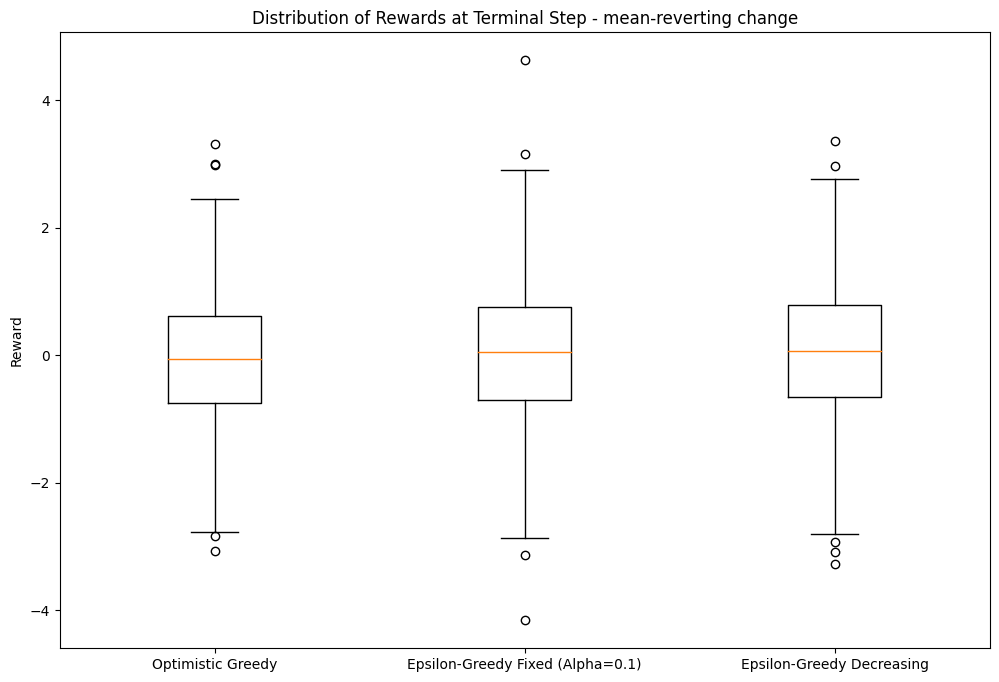

In [18]:
ka = 0.5
ep_variance = 0.01 ** 2

# Function to generate initial means
def generate_means():
    return np.random.normal(0, 1, k)

# Mean-reverting change function
def apply_mean_reverting_change(means):
    mean_reversion = ka * means  # Apply mean reversion
    noise = np.random.normal(0, np.sqrt(ep_variance), k)  # Generate noise
    return mean_reversion + noise  # Return updated means

# Optimistic Greedy Algorithm
def optimistic_greedy(means, steps):
    q_values = np.ones(k) * 5  # Optimistic initial values
    rewards = np.zeros(steps)  # Array to store rewards for each step

    for step in range(steps):
        action = np.argmax(q_values)  # Select action with the highest Q-value
        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Update Q-value using incremental formula
        q_values[action] += (reward - q_values[action]) / (step + 1)

        # Apply mean-reverting change to the means
        means = apply_mean_reverting_change(means)

    return rewards

# Epsilon-Greedy with Fixed Step Size (Alpha) Algorithm
def epsilon_greedy_fixed_alpha(means, steps, ep=0.1, alpha=0.1):
    q_values = np.zeros(k)  # Initialize Q-values to zero
    rewards = np.zeros(steps)  # Array to store rewards for each step

    for step in range(steps):
        if np.random.rand() < ep:  # Explore with probability epsilon
            action = np.random.choice(k)  # Select random action
        else:
            action = np.argmax(q_values)  # Exploit by selecting action with high Q-value

        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Update Q-value using fixed step size (alpha)
        q_values[action] += alpha * (reward - q_values[action])

        # Apply mean-reverting change to the means
        means = apply_mean_reverting_change(means)

    return rewards

# Epsilon-Greedy with Decreasing Step Size Algorithm
def epsilon_greedy_decreasing(means, steps, ep=0.1):
    q_values = np.zeros(k)  # Initialize Q-values to zero
    action_counts = np.zeros(k)  # Initialize action counts to zero
    rewards = np.zeros(steps)  # Array to store rewards for each step

    for step in range(steps):
        if np.random.rand() < ep:  # Explore with probability epsilon
            action = np.random.choice(k)  # Select random action
        else:
            action = np.argmax(q_values)  # Exploit by selecting action with highest Q-value

        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Increment action count and update Q-value using decreasing step size
        action_counts[action] += 1
        step_size = 1 / action_counts[action]  # Decreasing step size
        q_values[action] += step_size * (reward - q_values[action])

        # Apply mean-reverting change to the means
        means = apply_mean_reverting_change(means)

    return rewards

# Run experiments and collect data
optimistic_rewards = np.zeros((num_experiments, steps))
fixed_rewards = np.zeros((num_experiments, steps))
decreasing_rewards = np.zeros((num_experiments, steps))

for i in range(num_experiments):
    means = generate_means()  # Generate initial means for each experiment
    optimistic_rewards[i] = optimistic_greedy(means, steps)  # Run optimistic greedy algorithm

    means = generate_means()  # Generate new initial means
    fixed_rewards[i] = epsilon_greedy_fixed_alpha(means, steps)  # Run epsilon-greedy with fixed alpha

    means = generate_means()  # Generate new initial means
    decreasing_rewards[i] = epsilon_greedy_decreasing(means, steps)  # Run epsilon-greedy with decreasing step size

# Calculate mean rewards at the terminal step
optimistic_terminal_mean = optimistic_rewards[:, -1].mean()
fixed_terminal_mean = fixed_rewards[:, -1].mean()
decreasing_terminal_mean = decreasing_rewards[:, -1].mean()

# Print the mean rewards at the terminal step for each algorithm
print("Mean Rewards at Terminal Step (mean-reverting change):")
print(f"Optimistic Greedy(mean-reverting change): {optimistic_terminal_mean}")
print(f"Epsilon-Greedy Fixed (Alpha=0.1)(mean-reverting change): {fixed_terminal_mean}")
print(f"Epsilon-Greedy Decreasing(mean-reverting change): {decreasing_terminal_mean}")

# Create box plots to visualize the distribution of rewards at the terminal step
plt.figure(figsize=(12, 8))
plt.boxplot([optimistic_rewards[:, -1], fixed_rewards[:, -1], decreasing_rewards[:, -1]], labels=['Optimistic Greedy', 'Epsilon-Greedy Fixed (Alpha=0.1)', 'Epsilon-Greedy Decreasing'])
plt.title('Distribution of Rewards at Terminal Step - mean-reverting change')
plt.ylabel('Reward')
plt.show()


**Abrupt changes**

Mean Rewards at Terminal Step (Abrupt changes):
Optimistic Greedy(Abrupt changes): 0.6860612744266038
Epsilon-Greedy Fixed (Alpha=0.1)(Abrupt changes): 0.9400349901427507
Epsilon-Greedy Decreasing(Abrupt changes): 0.29778368547751566


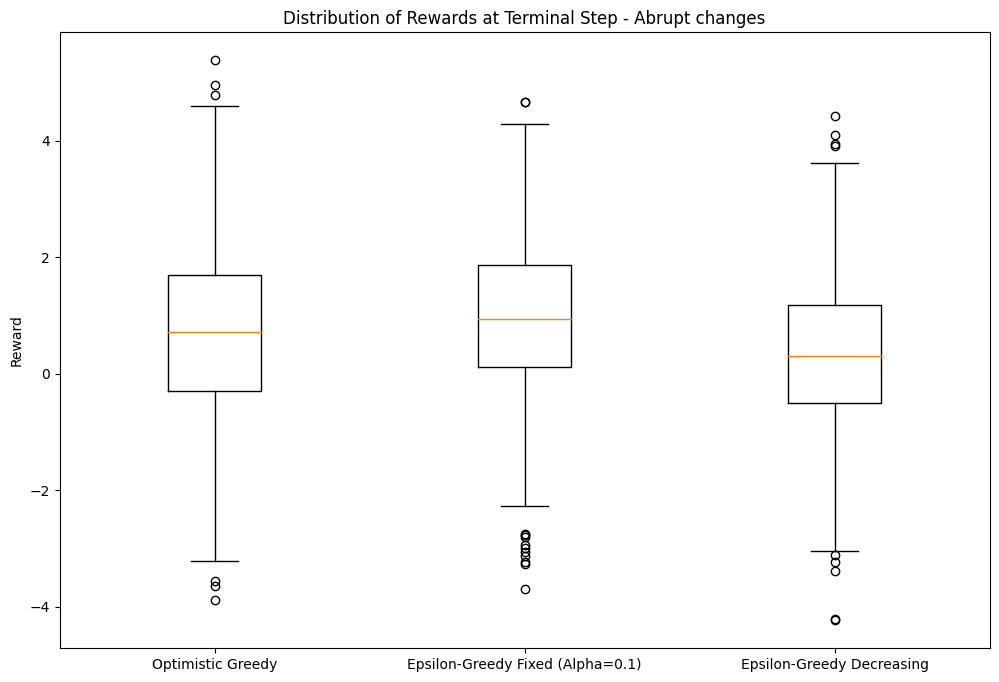

In [19]:
abrupt_change_prob = 0.005  # Probability of an abrupt change in means

# Function to generate initial means
def generate_means():
    return np.random.normal(0, 1, k)  # Generate initial means from a normal distribution

# Abrupt change function
def apply_abrupt_change(means):
    # With probability 0.005, permute the means to simulate an abrupt change
    if np.random.rand() < abrupt_change_prob:
        np.random.shuffle(means)
    return means

# Optimistic Greedy Algorithm
def optimistic_greedy(means, steps):
    q_values = np.ones(k) * 5  # Optimistic initial values
    rewards = np.zeros(steps)  # Array to store rewards for each step

    for step in range(steps):
        action = np.argmax(q_values)  # Select action with the highest Q-value
        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Update Q-value using incremental formula
        q_values[action] += (reward - q_values[action]) / (step + 1)

        # Apply abrupt change to the means
        means = apply_abrupt_change(means)

    return rewards

# Epsilon-Greedy with Fixed Step Size (Alpha) Algorithm
def epsilon_greedy_fixed_alpha(means, steps, ep=0.1, alpha=0.1):
    q_values = np.zeros(k)  # Initialize Q-values to zero
    rewards = np.zeros(steps)  # Array to store rewards for each step

    for step in range(steps):
        if np.random.rand() < ep:  # Explore with probability epsilon
            action = np.random.choice(k)  # Select random action
        else:
            action = np.argmax(q_values)  # Exploit by selecting action with highest Q-value

        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Update Q-value using fixed step size (alpha)
        q_values[action] += alpha * (reward - q_values[action])

        # Apply abrupt change to the means
        means = apply_abrupt_change(means)

    return rewards

# Epsilon-Greedy with Decreasing Step Size Algorithm
def epsilon_greedy_decreasing(means, steps, ep=0.1):
    q_values = np.zeros(k)  # Initialize Q-values to zero
    action_counts = np.zeros(k)  # Initialize action counts to zero
    rewards = np.zeros(steps)  # Array to store rewards for each step

    for step in range(steps):
        if np.random.rand() < ep:  # Explore with probability epsilon
            action = np.random.choice(k)  # Select random action
        else:
            action = np.argmax(q_values)  # Exploit by selecting action with highest Q-value

        reward = np.random.normal(means[action], 1)  # Generate reward for the chosen action
        rewards[step] = reward  # Record the reward

        # Increment action count and update Q-value using decreasing step size
        action_counts[action] += 1
        step_size = 1 / action_counts[action]  # Decreasing step size
        q_values[action] += step_size * (reward - q_values[action])

        # Apply abrupt change to the means
        means = apply_abrupt_change(means)

    return rewards

# Run experiments and collect data
optimistic_rewards = np.zeros((num_experiments, steps))
fixed_rewards = np.zeros((num_experiments, steps))
decreasing_rewards = np.zeros((num_experiments, steps))

for i in range(num_experiments):
    means = generate_means()  # Generate initial means for each experiment
    optimistic_rewards[i] = optimistic_greedy(means, steps)  # Run optimistic greedy algorithm

    means = generate_means()  # Generate new initial means
    fixed_rewards[i] = epsilon_greedy_fixed_alpha(means, steps)  # Run epsilon-greedy with fixed alpha

    means = generate_means()  # Generate new initial means
    decreasing_rewards[i] = epsilon_greedy_decreasing(means, steps)  # Run epsilon-greedy with decreasing step size

# Calculate mean rewards at the terminal step
optimistic_terminal_mean = optimistic_rewards[:, -1].mean()
fixed_terminal_mean = fixed_rewards[:, -1].mean()
decreasing_terminal_mean = decreasing_rewards[:, -1].mean()

# Print the mean rewards at the terminal step for each algorithm
print("Mean Rewards at Terminal Step (Abrupt changes):")
print(f"Optimistic Greedy(Abrupt changes): {optimistic_terminal_mean}")
print(f"Epsilon-Greedy Fixed (Alpha=0.1)(Abrupt changes): {fixed_terminal_mean}")
print(f"Epsilon-Greedy Decreasing(Abrupt changes): {decreasing_terminal_mean}")

# Create box plots to visualize the distribution of rewards at the terminal step
plt.figure(figsize=(12, 8))
plt.boxplot([optimistic_rewards[:, -1], fixed_rewards[:, -1], decreasing_rewards[:, -1]], labels=['Optimistic Greedy', 'Epsilon-Greedy Fixed (Alpha=0.1)', 'Epsilon-Greedy Decreasing'])
plt.title('Distribution of Rewards at Terminal Step - Abrupt changes')
plt.ylabel('Reward')
plt.show()
